In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic as log

In [ ]:
def convolute(inputImage, filterKernel, padding=0):
    imageHeight, imageWidth = inputImage.shape
    kernelHeight, kernelWidth = filterKernel.shape
    
    outputHeight = imageHeight - kernelHeight + 1 + 2 * padding
    outputWidth = imageWidth - kernelWidth + 1 + 2 * padding
    
    output = np.zeros((outputHeight, outputWidth))
    paddedImage = np.pad(inputImage, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
    
    for outputRow in range(outputHeight):
        for outputCol in range(outputWidth):
            pixelValue = 0
            for kernelRow in range(kernelHeight):
                for kernelCol in range(kernelWidth):
                    pixelValue += paddedImage[outputRow + kernelRow, outputCol + kernelCol] * filterKernel[kernelRow, kernelCol]
            output[outputRow, outputCol] = pixelValue
    return output

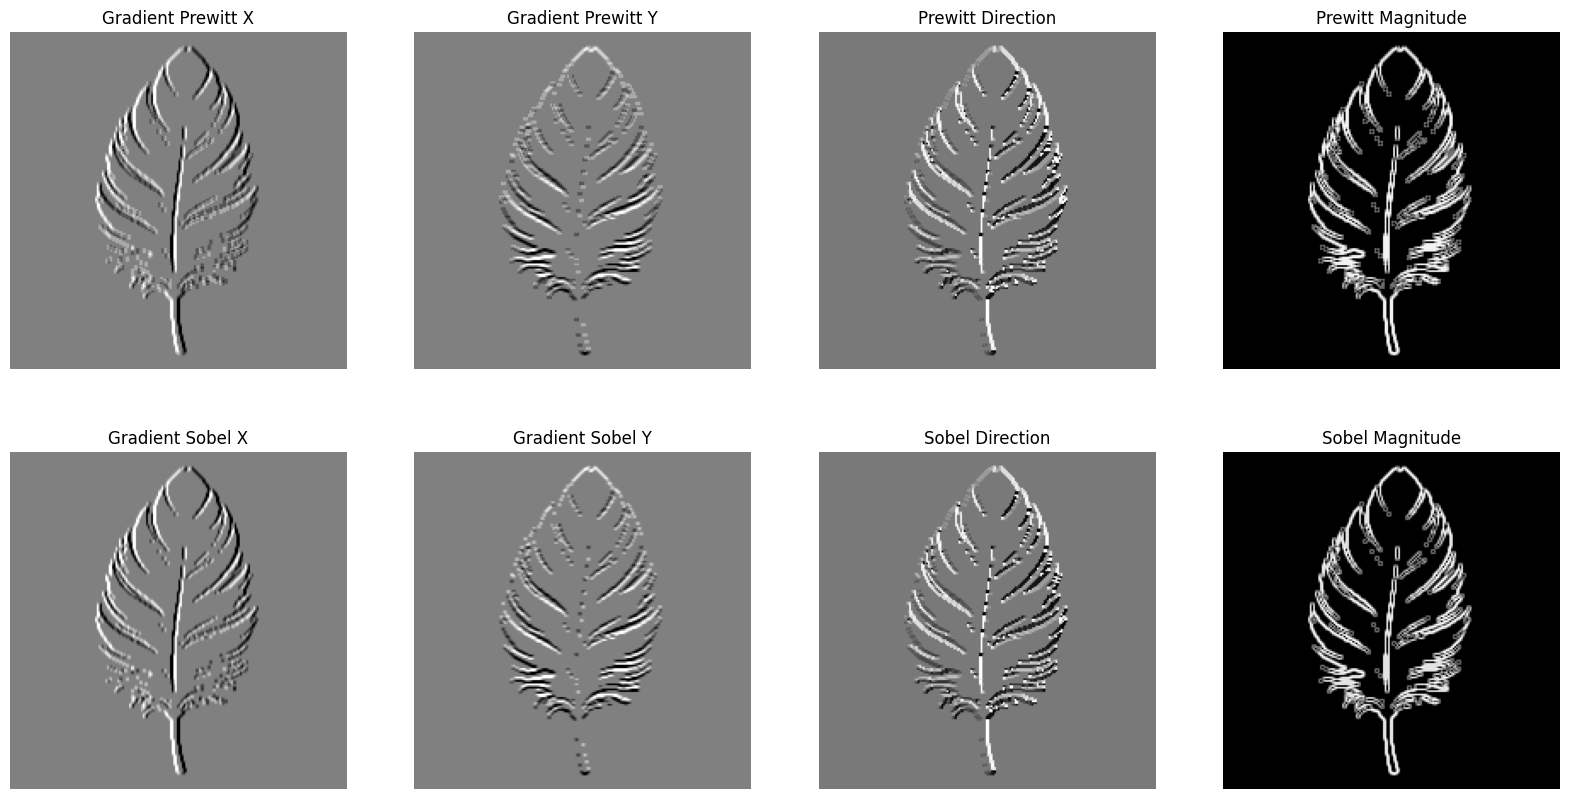

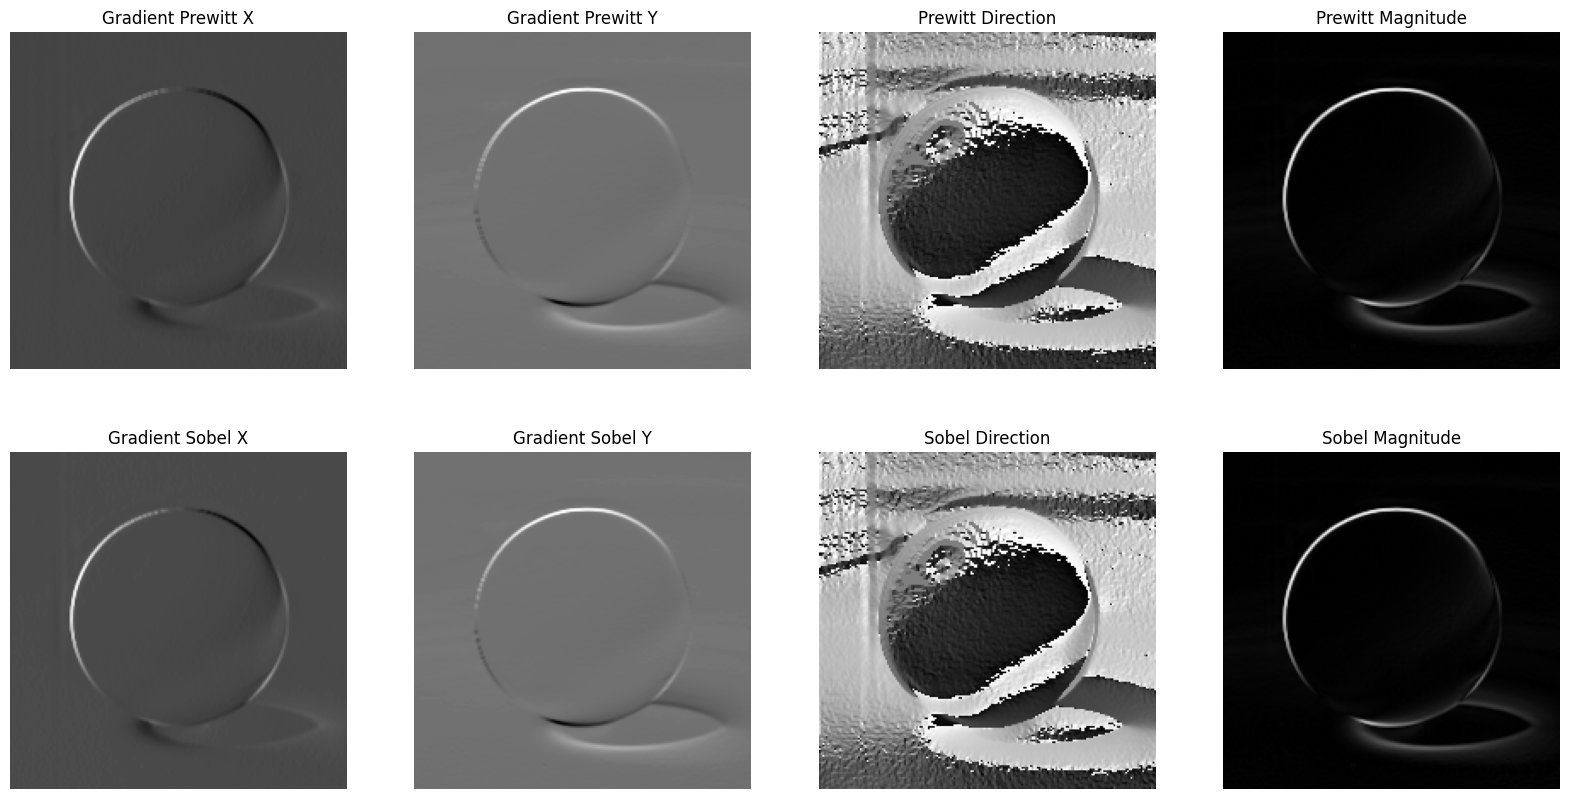

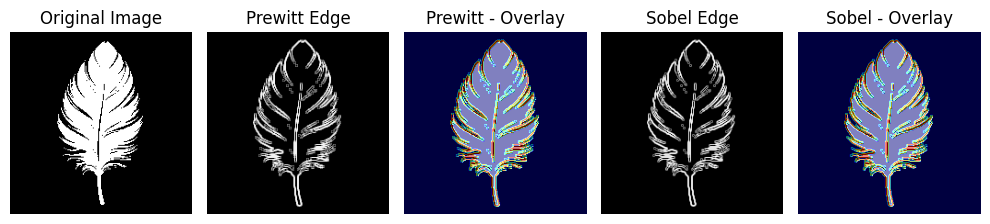

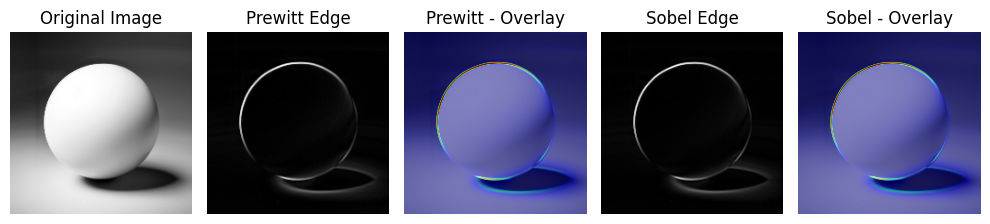

In [171]:
# Select 2 images and apply the Prewitt and Sobel operators for edge detection
prewittKernelX = np.array(
    [[-1, 0, 1],
     [-1, 0, 1],
     [-1, 0, 1]]
)
prewittKernelY = np.array(
    [[-1, -1, -1],
     [0, 0, 0],
     [1, 1, 1]]
)

sobelKernelX = np.array(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]]
)
sobelKernelY = np.array(
    [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]]
)


featherImgPath = "images/week7/feather.png"
sphereImgPath = "images/week7/sphere.png"

featherImg = cv2.imread(featherImgPath, cv2.IMREAD_GRAYSCALE)
sphereImg = cv2.imread(sphereImgPath, cv2.IMREAD_GRAYSCALE)
featherImg = featherImg.astype(np.float32)
sphereImg = sphereImg.astype(np.float32)

gradientPrewittFeatherX = convolute(featherImg, prewittKernelX)
gradientPrewittFeatherY = convolute(featherImg, prewittKernelY)
prewittFeatherMagnitude = np.sqrt(gradientPrewittFeatherX ** 2 + gradientPrewittFeatherY ** 2)      # Magnitude
prewittFeatherDirection = np.arctan2(gradientPrewittFeatherY, gradientPrewittFeatherX)              # Direction

gradientSobelFeatherX = convolute(featherImg, sobelKernelX)
gradientSobelFeatherY = convolute(featherImg, sobelKernelY)
sobelFeatherMagnitude = np.sqrt(gradientSobelFeatherX ** 2 + gradientSobelFeatherY ** 2)            # Magnitude
sobelFeatherDirection = np.arctan2(gradientSobelFeatherY, gradientSobelFeatherX)                    # Direction

gradientPrewittSphereX = convolute(sphereImg, prewittKernelX)
gradientPrewittSphereY = convolute(sphereImg, prewittKernelY)
prewittSphereMagnitude = np.sqrt(gradientPrewittSphereX ** 2 + gradientPrewittSphereY ** 2)         # Magnitude
prewittSphereDirection = np.arctan2(gradientPrewittSphereY, gradientPrewittSphereX)                 # Direction

gradientSobelSphereX = convolute(sphereImg, sobelKernelX)
gradientSobelSphereY = convolute(sphereImg, sobelKernelY)
sobelSphereMagnitude = np.sqrt(gradientSobelSphereX ** 2 + gradientSobelSphereY ** 2)                               # Magnitude
sobelSphereDirection = np.arctan2(gradientSobelSphereY, gradientSobelSphereX)                                       # Direction


plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
plt.imshow(gradientPrewittFeatherX, cmap="gray")
plt.title("Gradient Prewitt X")
plt.axis("off")
plt.subplot(2, 4, 2)
plt.imshow(gradientPrewittFeatherY, cmap="gray")
plt.title("Gradient Prewitt Y")
plt.axis("off")
plt.subplot(2, 4, 3)
plt.imshow(prewittFeatherDirection, cmap="gray")
plt.title("Prewitt Direction")
plt.axis("off")
plt.subplot(2, 4, 4)
plt.imshow(prewittFeatherMagnitude, cmap="gray")
plt.title("Prewitt Magnitude")
plt.axis("off")
plt.subplot(2, 4, 5)
plt.imshow(gradientSobelFeatherX, cmap="gray")
plt.title("Gradient Sobel X")
plt.axis("off")
plt.subplot(2, 4, 6)
plt.imshow(gradientSobelFeatherY, cmap="gray")
plt.title("Gradient Sobel Y")
plt.axis("off")
plt.subplot(2, 4, 7)
plt.imshow(sobelFeatherDirection, cmap="gray")
plt.title("Sobel Direction")
plt.axis("off")
plt.subplot(2, 4, 8)
plt.imshow(sobelFeatherMagnitude, cmap="gray")
plt.title("Sobel Magnitude")
plt.axis("off")

plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
plt.imshow(gradientPrewittSphereX, cmap="gray")
plt.title("Gradient Prewitt X")
plt.axis("off")
plt.subplot(2, 4, 2)
plt.imshow(gradientPrewittSphereY, cmap="gray")
plt.title("Gradient Prewitt Y")
plt.axis("off")
plt.subplot(2, 4, 3)
plt.imshow(prewittSphereDirection, cmap="gray")
plt.title("Prewitt Direction")
plt.axis("off")
plt.subplot(2, 4, 4)
plt.imshow(prewittSphereMagnitude, cmap="gray")
plt.title("Prewitt Magnitude")
plt.axis("off")
plt.subplot(2, 4, 5)
plt.imshow(gradientSobelSphereX, cmap="gray")
plt.title("Gradient Sobel X")
plt.axis("off")
plt.subplot(2, 4, 6)
plt.imshow(gradientSobelSphereY, cmap="gray")
plt.title("Gradient Sobel Y")
plt.axis("off")
plt.subplot(2, 4, 7)
plt.imshow(sobelSphereDirection, cmap="gray")
plt.title("Sobel Direction")
plt.axis("off")
plt.subplot(2, 4, 8)
plt.imshow(sobelSphereMagnitude, cmap="gray")
plt.title("Sobel Magnitude")
plt.axis("off")

plt.figure(figsize=(10, 10))
plt.subplot(1, 5, 1)
plt.imshow(featherImg, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 5, 2)
plt.imshow(prewittFeatherMagnitude, cmap="gray")
plt.title("Prewitt Edge")
plt.axis("off")
plt.subplot(1, 5, 3)
plt.imshow(featherImg, cmap="gray")
plt.imshow(prewittFeatherMagnitude, cmap="jet", alpha=0.5)
plt.title("Prewitt - Overlay")
plt.axis("off")
plt.subplot(1, 5, 4)
plt.imshow(sobelFeatherMagnitude, cmap="gray")
plt.title("Sobel Edge")
plt.axis("off")
plt.subplot(1, 5, 5)
plt.imshow(featherImg, cmap="gray")
plt.imshow(sobelFeatherMagnitude, cmap="jet", alpha=0.5)
plt.title("Sobel - Overlay")
plt.axis("off")
plt.tight_layout()

plt.figure(figsize=(10, 10))
plt.subplot(1, 5, 1)
plt.imshow(sphereImg, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 5, 2)
plt.imshow(prewittSphereMagnitude, cmap="gray")
plt.title("Prewitt Edge")
plt.axis("off")
plt.subplot(1, 5, 3)
plt.imshow(sphereImg, cmap="gray")
plt.imshow(prewittSphereMagnitude, cmap="jet", alpha=0.5)
plt.title("Prewitt - Overlay")
plt.axis("off")
plt.subplot(1, 5, 4)
plt.imshow(sobelSphereMagnitude, cmap="gray")
plt.title("Sobel Edge")
plt.axis("off")
plt.subplot(1, 5, 5)
plt.imshow(sphereImg, cmap="gray")
plt.imshow(sobelSphereMagnitude, cmap="jet", alpha=0.5)
plt.title("Sobel - Overlay")
plt.axis("off")
plt.tight_layout()

plt.show()

In [ ]:
# Select 2 images and apply the Roberts operator the images
def roberts_operator(img, threshold=1):
    robertsCrossX = np.array([
        [1, 0], 
        [0, -1]
        ])
    robertCrossY = np.array([
        [0, 1], 
        [-1, 0]
        ])
    
    gradientX = convolute(img, robertsCrossX)
    gradientY = convolute(img, robertCrossY)
    
    robertMagnitude = np.sqrt(gradientX ** 2 + gradientY ** 2)
    robertEdges = robertMagnitude > threshold
    
    return robertEdges

ic| robertsButterflyEdges: array([[False, False, False, ..., False, False, False],
                                  [False, False, False, ..., False, False, False],
                                  [False, False, False, ..., False, False, False],
                                  ...,
                                  [False, False, False, ..., False, False, False],
                                  [False, False, False, ..., False, False, False],
                                  [False, False, False, ..., False, False, False]])


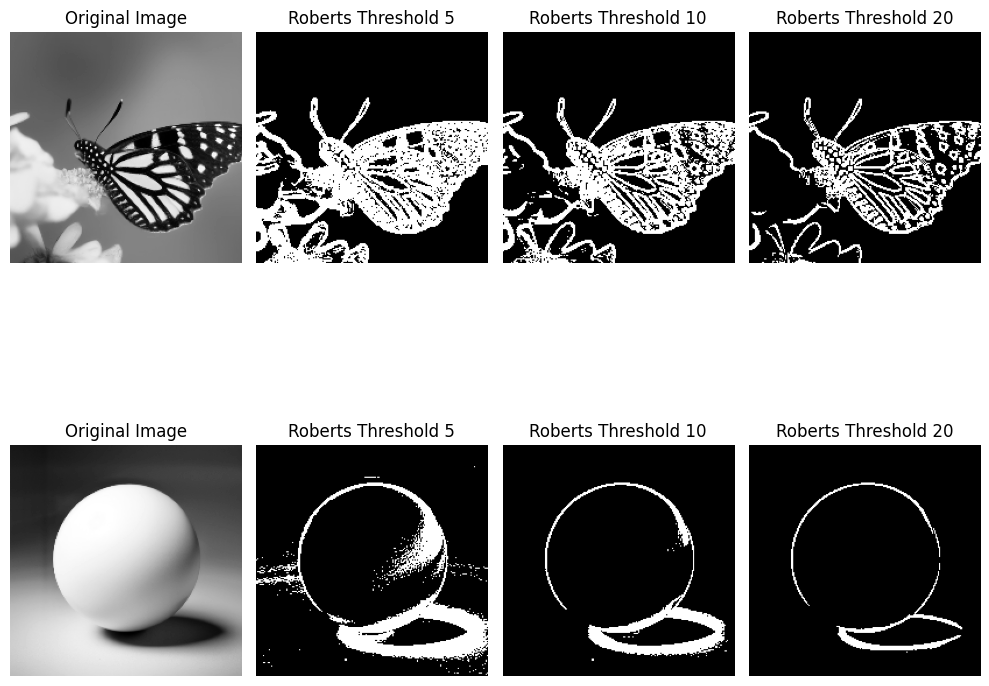

In [ ]:
butterflyImgPath = "images/week6/butterfly.png"
sphereImgPath = "images/week7/sphere.png"
butterflyImg = cv2.imread(butterflyImgPath, cv2.IMREAD_GRAYSCALE)
sphereImg = cv2.imread(sphereImgPath, cv2.IMREAD_GRAYSCALE)

robertsButterflyEdges = roberts_operator(butterflyImg, 5)
robertsButterflyEdges5 = roberts_operator(butterflyImg, 10)
robertsButterflyEdges10 = roberts_operator(butterflyImg, 20)

robertsSphereEdges = roberts_operator(sphereImg, 5)
robertsSphereEdges5 = roberts_operator(sphereImg, 10)
robertsSphereEdges10 = roberts_operator(sphereImg, 20)

plt.figure(figsize=(10, 10))
plt.subplot(2, 4, 1)
plt.imshow(butterflyImg, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(2, 4, 2)
plt.imshow(robertsButterflyEdges, cmap="gray")
plt.title("Roberts Threshold 5")
plt.axis("off")
plt.subplot(2, 4, 3)
plt.imshow(robertsButterflyEdges5, cmap="gray")
plt.title("Roberts Threshold 10")
plt.axis("off")
plt.subplot(2, 4, 4)
plt.imshow(robertsButterflyEdges10, cmap="gray")
plt.title("Roberts Threshold 20")
plt.axis("off")
plt.subplot(2, 4, 5)
plt.imshow(sphereImg, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(2, 4, 6)
plt.imshow(robertsSphereEdges, cmap="gray")
plt.title("Roberts Threshold 5")
plt.axis("off")
plt.subplot(2, 4, 7)
plt.imshow(robertsSphereEdges5, cmap="gray")
plt.title("Roberts Threshold 10")
plt.axis("off")
plt.subplot(2, 4, 8)
plt.imshow(robertsSphereEdges10, cmap="gray")
plt.title("Roberts Threshold 20")
plt.axis("off")
plt.tight_layout()

plt.show()


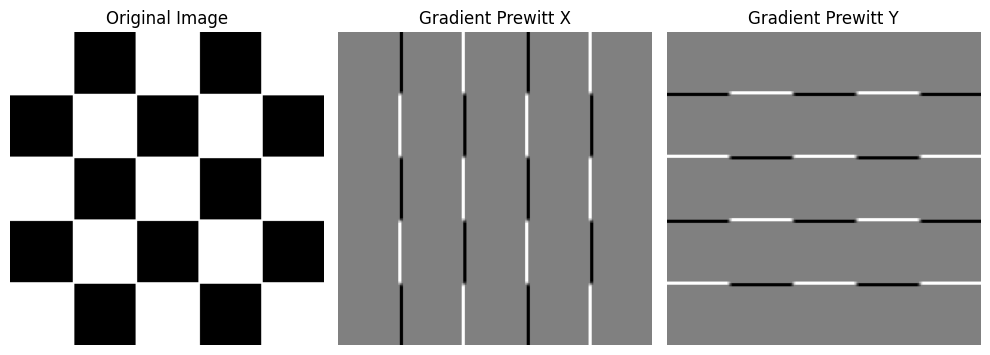

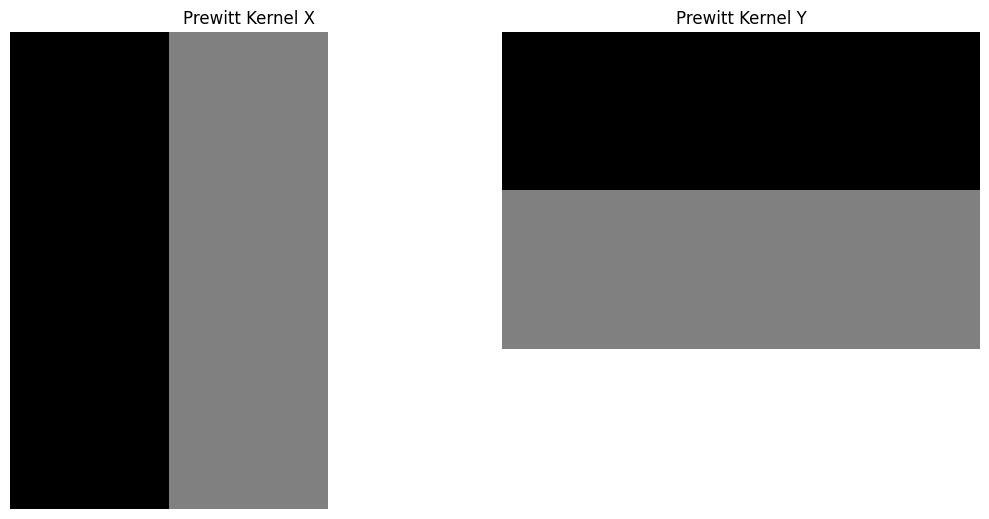

In [ ]:
# Explain clearly about the horizontal derivative can well capture vertical edges and vice versa
chessImgPath = "images/week4/chess.png"
chessImg = cv2.imread(chessImgPath, cv2.IMREAD_GRAYSCALE)

prewittKernelX = np.array(
    [[-1, 0, 1],
     [-1, 0, 1],
     [-1, 0, 1]]
)
prewittKernelY = np.array(
    [[-1, -1, -1],
     [0, 0, 0],
     [1, 1, 1]]
)

gradientPrewittChessX = convolute(chessImg, prewittKernelX)
gradientPrewittChessY = convolute(chessImg, prewittKernelY)
prewittChessMagnitude = np.sqrt(gradientPrewittChessX ** 2 + gradientPrewittChessY ** 2)      # Magnitude

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(chessImg, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(gradientPrewittChessX, cmap="gray")
plt.title("Gradient Prewitt X")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(gradientPrewittChessY, cmap="gray")
plt.title("Gradient Prewitt Y")
plt.axis("off")
plt.tight_layout()

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(prewittKernelX, cmap="gray")
plt.title("Prewitt Kernel X")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(prewittKernelY, cmap="gray")
plt.title("Prewitt Kernel Y")
plt.axis("off")
plt.tight_layout()

plt.show()
